<a href="https://colab.research.google.com/github/FabioPojo1987/FabioPojo1987-MVP_2_DATA_SCIENCE_PUC_RIO/blob/main/MVP_2_DATA_SCIENCE_PUC_Rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto da 2ª Sprint do curso de Ciência de Dados na PUC Rio

Este projeto se trata de um aprendizado de máquina para criar insights sobre a variação da taxa de Câmbio entre o Dólar Americano USD e o Real Brasileiro BRL em um determinado período de tempo entre o passado e o presente.

Neste projeto, irá ser utilizado a biblioteca que o Yahoo Finance disponibiliza para uso no Python, o "yfinance library" para podermos adquirir as informações necessárias do histórico do Banco de Dados do Yahoo Finance.

# 1º passo: Instalando a Biblioteca necessária para obter, ler e exibir dados do site Yahoo Finance

In [ ]:
pip install yfinance matplotlib

# Passo 2: Importando as demais bibliotecas necessárias (caso não tenha instalado no passo anterior, podendo usar nesta etapa)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Passo 3: Definindo os parâmetros históricos a serem pesquisados (utilizei um intervalo entre janeiro do ano 2010 e abril de 2024) no Yahoo Finance

In [ ]:
start_date = '2010-01-01'
end_date = '2024-04-30'
data = yf.download('USDBRL=X', start=start_date, end=end_date)

# Passo 4: Fazendo o Pré processamento de dados

In [ ]:
data = data['Close'].resample('M').mean().ffill()

# Passo 5: Separando os dados em treinamento e testes

In [ ]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Passo 6: Criando um modelo de treinamento em Machine Learning (definindo os parâmetros de configuração de Machine Learning)

In [32]:
X_train = pd.DataFrame(index=train_data.index)
X_train['month'] = train_data.index.month
X_train['year'] = train_data.index.year
y_train = train_data.values

# Passo 7: Escolhendo o modelo de Machine Learning (foi optado pela regressão, pois se trata de analise histórica)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Passo 8: Criando conjunto de dados para elaborar previsões

In [ ]:
X_test = pd.DataFrame(index=test_data.index)
X_test['month'] = test_data.index.month
X_test['year'] = test_data.index.year
y_test = test_data.values
predictions = model.predict(X_test)

# Passo 9: Visualizando os resultados em gráficos de linhas

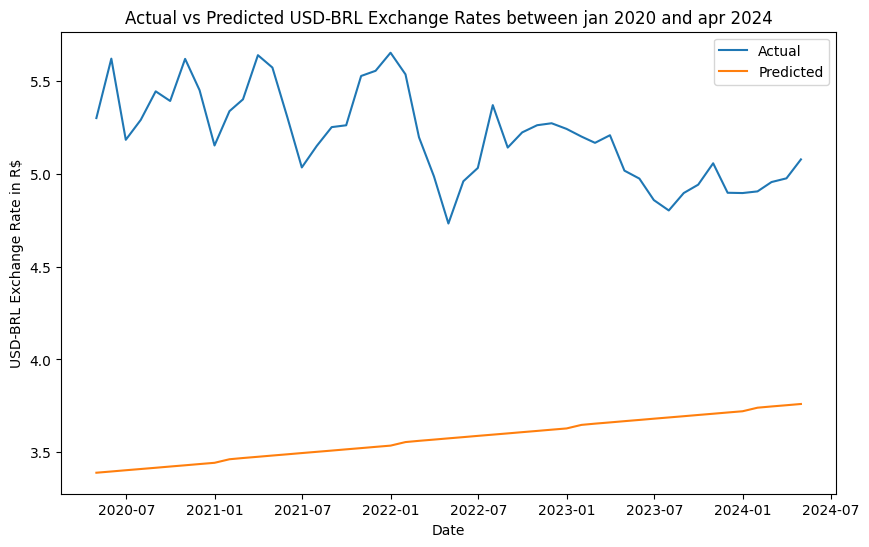

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('USD-BRL Exchange Rate in R$')
plt.title('Actual vs Predicted USD-BRL Exchange Rates between jan 2020 and apr 2024')
plt.legend()
plt.show()

Ao observar os gráficos, é possível perceber a variação na taxa de câmbio entre o Real Brasileiro (BRL-R$) e o Dólar Americano (USD) no período da Pandemia da Covid-19 (2020 a 2022) e o período de retomada da economia no Pós Pandemia (2022 até o presente momento). Ao comparar com o que era previsto à época da pandemia, podemos observar a enorme diferença na taxa de câmbio.

O que mostra como a AI pode ser uma boa ferramenta para analisar e planejar medidas no sentido da economia nacional a fim de elaborar novas formas de melhorias na taxa de câmbio